## Import Packages

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# read
df = pd.read_csv('data/5guys_flight_data_preprocessed.csv')
df.head()

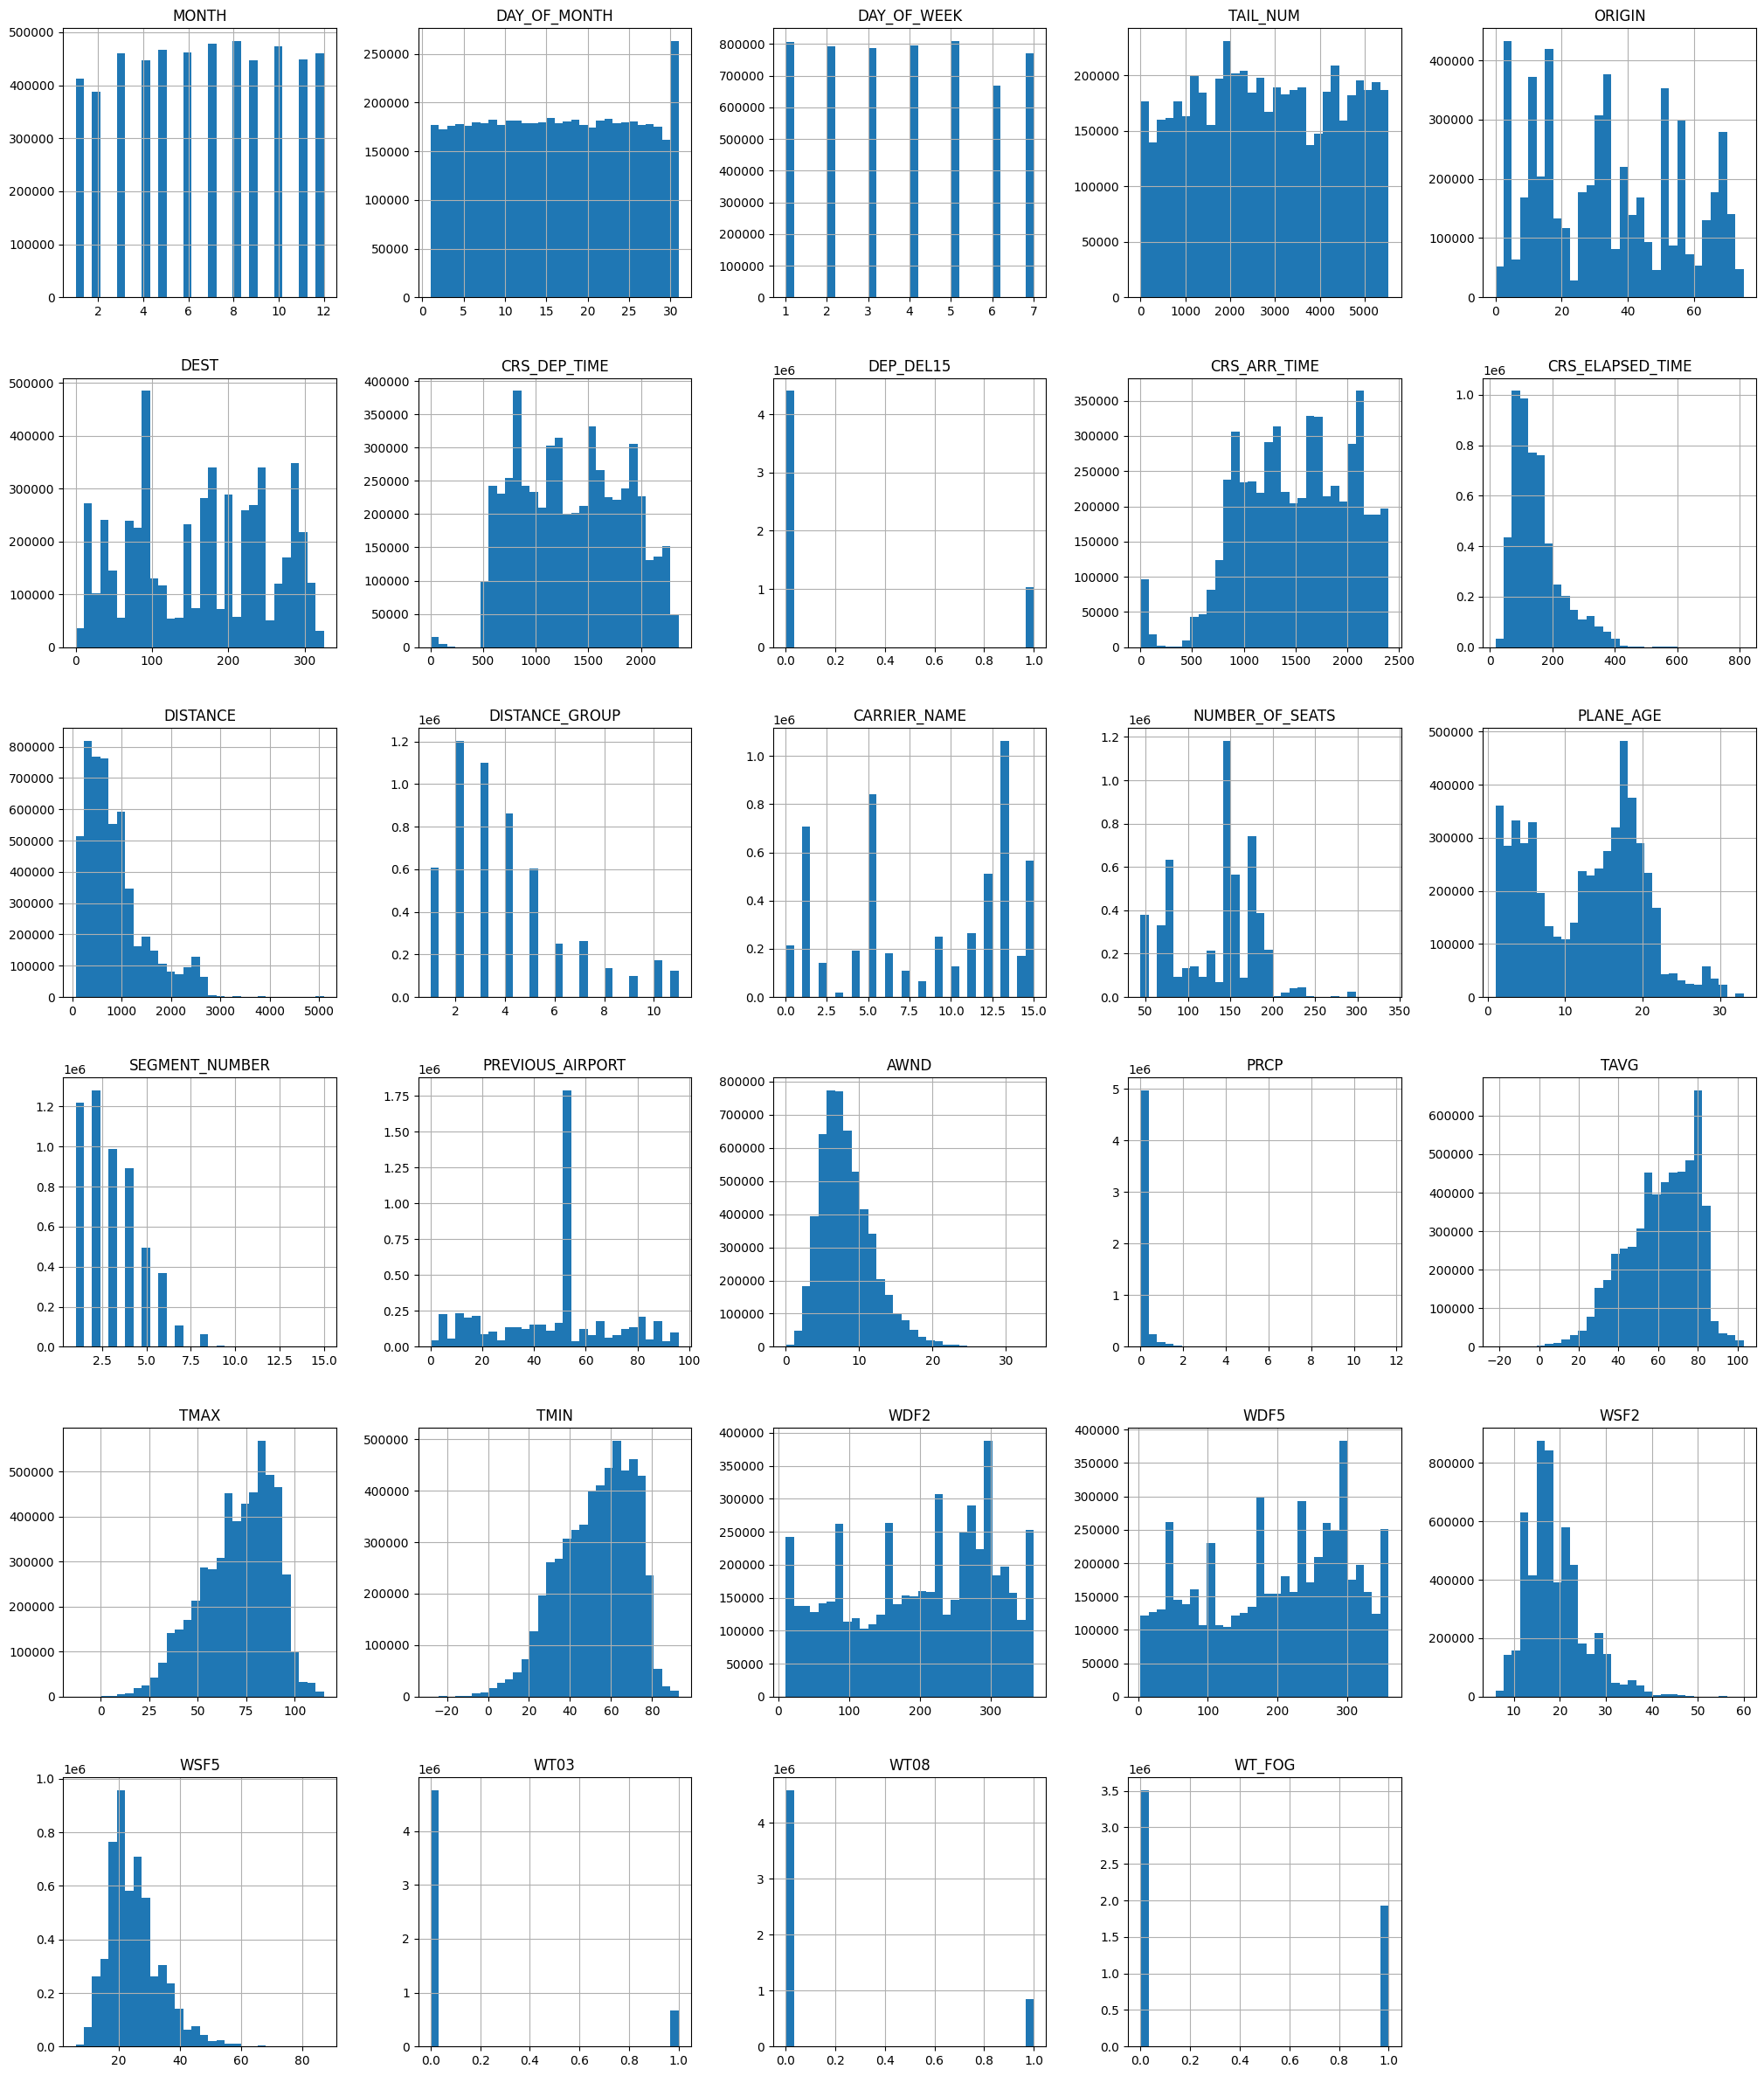

In [5]:
df.hist(bins=30, figsize=(25, 30));

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

print("Keras is installed successfully!")


TensorFlow version: 2.13.0
Keras is installed successfully!


Epoch 1/10
5773/5773 [==============================] - 49s 8ms/step - loss: 0.6599 - accuracy: 0.6027 - val_loss: 0.6569 - val_accuracy: 0.6055
Epoch 2/10
5773/5773 [==============================] - 55s 10ms/step - loss: 0.6609 - accuracy: 0.6018 - val_loss: 0.6637 - val_accuracy: 0.5963
Epoch 3/10
5773/5773 [==============================] - 56s 10ms/step - loss: 0.6664 - accuracy: 0.5985 - val_loss: 0.6714 - val_accuracy: 0.6007
Epoch 4/10
5773/5773 [==============================] - 49s 9ms/step - loss: 0.6726 - accuracy: 0.5956 - val_loss: 0.6568 - val_accuracy: 0.6058
Epoch 5/10
5773/5773 [==============================] - 49s 8ms/step - loss: 0.6814 - accuracy: 0.5915 - val_loss: 0.6691 - val_accuracy: 0.6017
Epoch 6/10
5773/5773 [==============================] - 50s 9ms/step - loss: 0.6901 - accuracy: 0.5878 - val_loss: 0.7001 - val_accuracy: 0.5942
Epoch 7/10
5773/5773 [==============================] - 56s 10ms/step - loss: 0.7078 - accuracy: 0.5820 - val_loss: 0.6627 - val

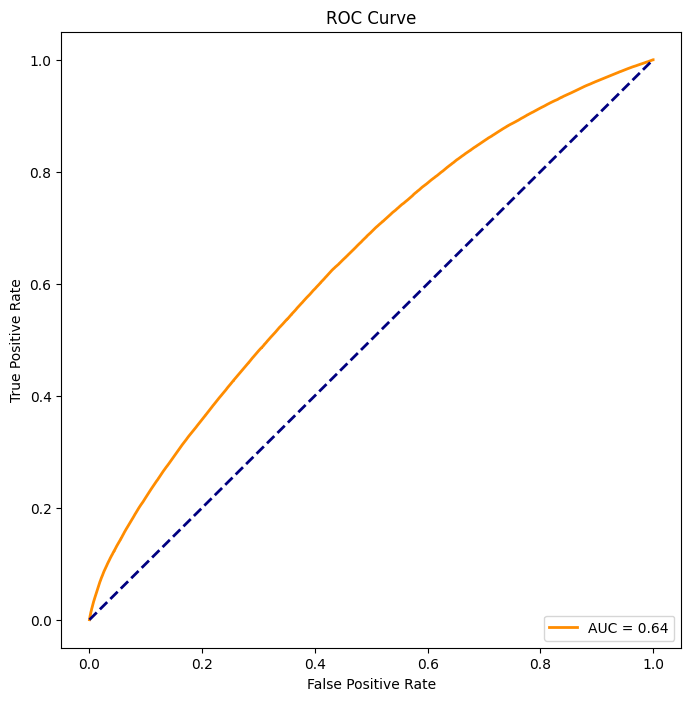

Accuracy: 0.5831557818556815
Confusion Matrix:
[[253213 187198]
 [ 39163  63461]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.57      0.69    440411
         1.0       0.25      0.62      0.36    102624

    accuracy                           0.58    543035
   macro avg       0.56      0.60      0.53    543035
weighted avg       0.75      0.58      0.63    543035



/Users/terlan/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: plot_confusion_matrix only supports classifiers

<Figure size 600x600 with 0 Axes>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers


# Assuming df is your DataFrame with features and labels, and the label column is named 'target'
# X contains your features (all columns except 'target'), y contains your labels ('target')

# Select all columns as features except the target column
features = df.columns.tolist()
features.remove('DEP_DEL15')

target = 'DEP_DEL15'  # You can choose another relevant column for binary classification
df = df.dropna(subset=[target])

# Split the dataset into training and testing sets
X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Perform undersampling on the training data only
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))  # Adding one more hidden layer
model.add(Dense(1, activation='sigmoid'))


# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train_resampled, test_size=0.2, stratify=y_train_resampled,random_state=42)
history = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_val, y_val), verbose=1)

# Make predictions on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the original test set
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

# Confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(model, X_test_scaled, y_test, display_labels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix (After Undersampling)')
plt.show()


Epoch 1/25
5773/5773 [==============================] - 50s 9ms/step - loss: 0.6668 - accuracy: 0.5991 - val_loss: 0.6662 - val_accuracy: 0.5954
Epoch 2/25
5773/5773 [==============================] - 54s 9ms/step - loss: 0.7044 - accuracy: 0.5814 - val_loss: 0.9056 - val_accuracy: 0.5532
Epoch 3/25
5773/5773 [==============================] - 54s 9ms/step - loss: 0.7844 - accuracy: 0.5677 - val_loss: 0.9681 - val_accuracy: 0.5491
Epoch 4/25
5773/5773 [==============================] - 54s 9ms/step - loss: 0.9658 - accuracy: 0.5556 - val_loss: 0.9040 - val_accuracy: 0.5781
Epoch 5/25
5773/5773 [==============================] - 50s 9ms/step - loss: 1.2938 - accuracy: 0.5479 - val_loss: 0.7541 - val_accuracy: 0.5878
Epoch 6/25
5773/5773 [==============================] - 48s 8ms/step - loss: 1.6430 - accuracy: 0.5434 - val_loss: 1.8618 - val_accuracy: 0.5791
Epoch 7/25
5773/5773 [==============================] - 45s 8ms/step - loss: 2.1770 - accuracy: 0.5409 - val_loss: 3.3554 - val_ac

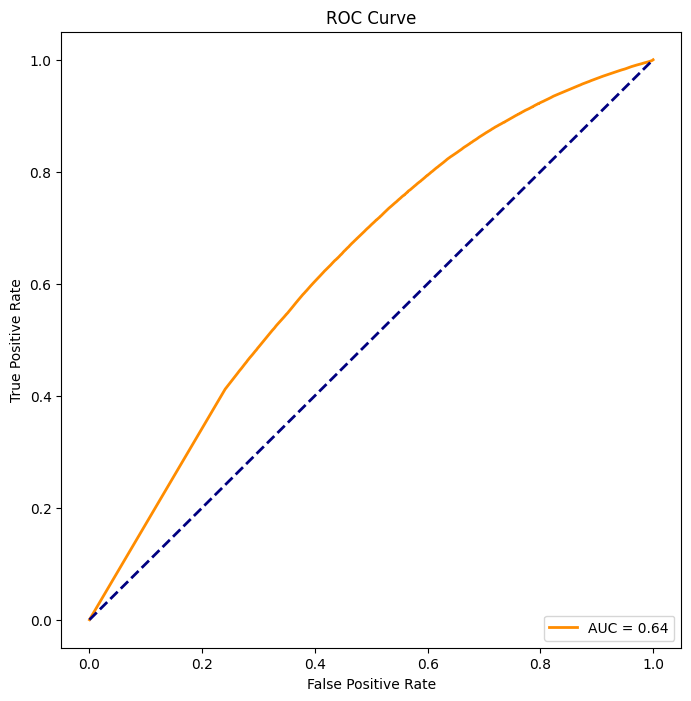

Accuracy: 0.5819072435478376
Confusion Matrix:
[[250651 189760]
 [ 37279  65345]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.57      0.69    440411
         1.0       0.26      0.64      0.37    102624

    accuracy                           0.58    543035
   macro avg       0.56      0.60      0.53    543035
weighted avg       0.75      0.58      0.63    543035



In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout, BatchNormalization


# Assuming df is your DataFrame with features and labels, and the label column is named 'target'
# X contains your features (all columns except 'target'), y contains your labels ('target')

# Select all columns as features except the target column
features = df.columns.tolist()
features.remove('DEP_DEL15')

target = 'DEP_DEL15'  # You can choose another relevant column for binary classification
df = df.dropna(subset=[target])

# Split the dataset into training and testing sets
X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Perform undersampling on the training data only
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))  # Adding one more hidden layer
model.add(Dense(1, activation='sigmoid'))


# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizers.Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train_resampled, test_size=0.2, stratify=y_train_resampled,random_state=42)
history = model.fit(X_train, y_train, epochs=25, batch_size=256, validation_data=(X_val, y_val), verbose=1)

# Make predictions on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the original test set
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

# Confusion matrix
#plt.figure(figsize=(6, 6))
#plot_confusion_matrix(model, X_test_scaled, y_test, display_labels=['Not Delayed', 'Delayed'])
#plt.title('Confusion Matrix (After Undersampling)')
#plt.show()


Epoch 1/10
12828/12828 [==============================] - 247s 19ms/step - loss: 0.6621 - accuracy: 0.6023 - val_loss: 0.7159 - val_accuracy: 0.5307
Epoch 2/10
12828/12828 [==============================] - 244s 19ms/step - loss: 0.6618 - accuracy: 0.6025 - val_loss: 0.6265 - val_accuracy: 0.6341
Epoch 3/10
12828/12828 [==============================] - 234s 18ms/step - loss: 0.6617 - accuracy: 0.6026 - val_loss: 0.6842 - val_accuracy: 0.5602
Epoch 4/10
12828/12828 [==============================] - 232s 18ms/step - loss: 0.6619 - accuracy: 0.6028 - val_loss: 0.6589 - val_accuracy: 0.5897
Epoch 5/10
12828/12828 [==============================] - 232s 18ms/step - loss: 0.6616 - accuracy: 0.6028 - val_loss: 0.6508 - val_accuracy: 0.6018
Epoch 6/10
12828/12828 [==============================] - 232s 18ms/step - loss: 0.6618 - accuracy: 0.6025 - val_loss: 0.6850 - val_accuracy: 0.5604
Epoch 7/10
12828/12828 [==============================] - 232s 18ms/step - loss: 0.6618 - accuracy: 0.6027

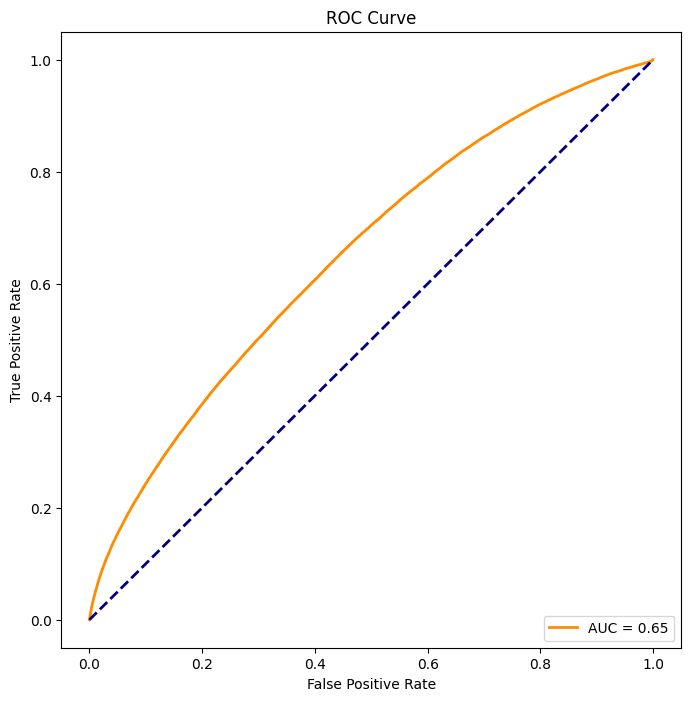

Accuracy: 0.6260646183026877
Confusion Matrix:
[[281822 158589]
 [ 44471  58153]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.64      0.74    440411
         1.0       0.27      0.57      0.36    102624

    accuracy                           0.63    543035
   macro avg       0.57      0.60      0.55    543035
weighted avg       0.75      0.63      0.67    543035



In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout, BatchNormalization


# Assuming df is your DataFrame with features and labels, and the label column is named 'target'
# X contains your features (all columns except 'target'), y contains your labels ('target')

# Select all columns as features except the target column
features = df.columns.tolist()
features.remove('DEP_DEL15')

target = 'DEP_DEL15'  # You can choose another relevant column for binary classification
df = df.dropna(subset=[target])

# Split the dataset into training and testing sets
X = df[features]
y = df[target]

# Split the dataset into training and testing sets
# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Perform undersampling on the training data only
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.02), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_resampled, epochs=10, batch_size=128, validation_data=(X_val_scaled, y_val), verbose=1)

# Make predictions on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the original test set
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

# Confusion matrix
#plt.figure(figsize=(6, 6))
#plot_confusion_matrix(model, X_test_scaled, y_test, display_labels=['Not Delayed', 'Delayed'])
#plt.title('Confusion Matrix (After Undersampling)')
#plt.show()


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x3b31bdea0>
Traceback (most recent call last):
  File "/Users/terlan/anaconda3/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


Epoch 1/20
12828/12828 [==============================] - 517s 40ms/step - loss: 0.6448 - accuracy: 0.6248 - val_loss: 0.6278 - val_accuracy: 0.6542
Epoch 2/20
12828/12828 [==============================] - 510s 40ms/step - loss: 0.6310 - accuracy: 0.6396 - val_loss: 0.6223 - val_accuracy: 0.6450
Epoch 3/20
12828/12828 [==============================] - 504s 39ms/step - loss: 0.6271 - accuracy: 0.6436 - val_loss: 0.6200 - val_accuracy: 0.6612
Epoch 4/20
12828/12828 [==============================] - 507s 40ms/step - loss: 0.6249 - accuracy: 0.6460 - val_loss: 0.6179 - val_accuracy: 0.6590
Epoch 5/20
12828/12828 [==============================] - 496s 39ms/step - loss: 0.6231 - accuracy: 0.6477 - val_loss: 0.6192 - val_accuracy: 0.6545
Epoch 6/20
12828/12828 [==============================] - 495s 39ms/step - loss: 0.6214 - accuracy: 0.6487 - val_loss: 0.6114 - val_accuracy: 0.6636
Epoch 7/20
12828/12828 [==============================] - 496s 39ms/step - loss: 0.6201 - accuracy: 0.6500

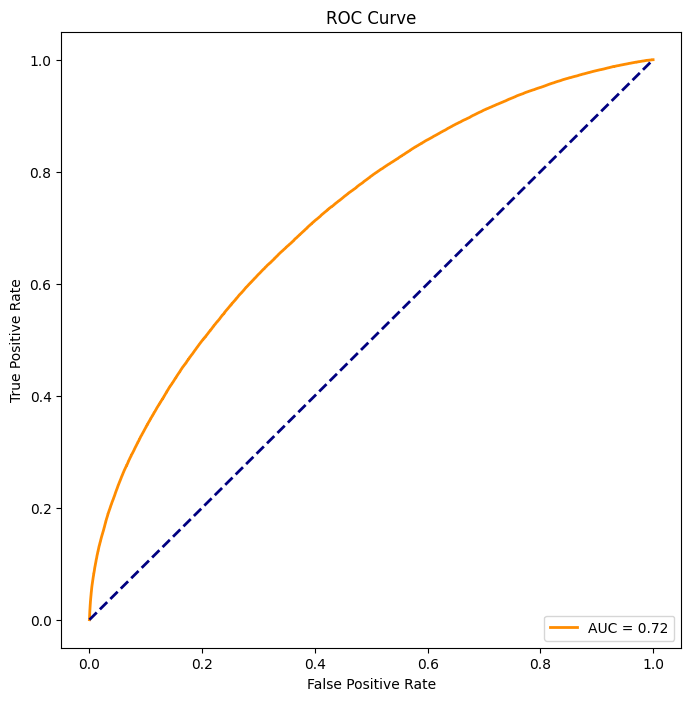

Accuracy: 0.6819891903836769
Confusion Matrix:
[[306656 133755]
 [ 38936  63688]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.70      0.78    440411
         1.0       0.32      0.62      0.42    102624

    accuracy                           0.68    543035
   macro avg       0.60      0.66      0.60    543035
weighted avg       0.78      0.68      0.71    543035



In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with features and labels, and the label column is named 'target'
# X contains your features (all columns except 'target'), y contains your labels ('target')

# Select all columns as features except the target column
features = df.columns.tolist()
features.remove('DEP_DEL15')

target = 'DEP_DEL15'  # You can choose another relevant column for binary classification
df = df.dropna(subset=[target])

# Split the dataset into training and testing sets
X = df[features]
y = df[target]

# Split the dataset into training and testing sets
# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Perform undersampling on the training data only
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_reshaped = X_val_scaled.reshape((X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build an improved LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(1, X_train_scaled.shape[1]), return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_reshaped, y_train_resampled, epochs=20, batch_size=128, validation_data=(X_val_reshaped, y_val), verbose=1)

# Make predictions on the test set
y_pred_proba = model.predict(X_test_reshaped)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the original test set
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)


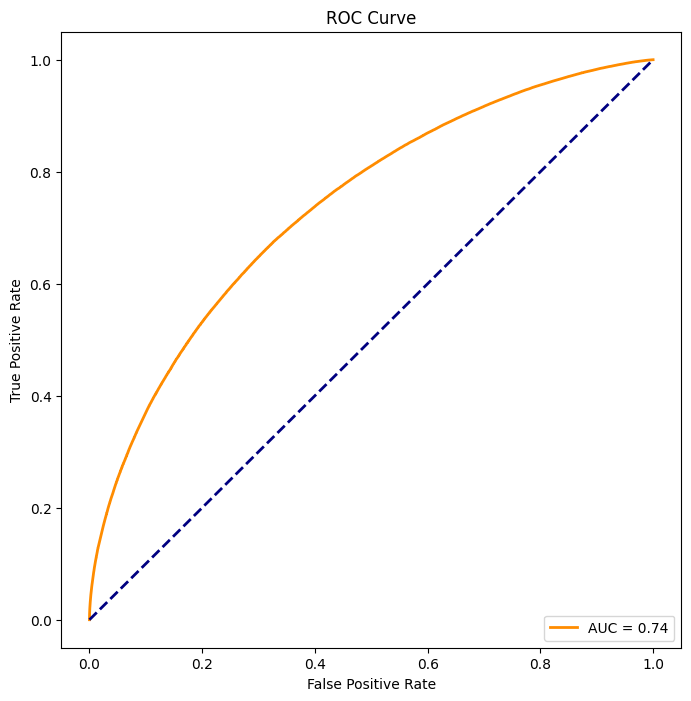

Accuracy: 0.6832908406371971
Confusion Matrix:
[[606773 274048]
 [ 69920 135328]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.69      0.78    880821
         1.0       0.33      0.66      0.44    205248

    accuracy                           0.68   1086069
   macro avg       0.61      0.67      0.61   1086069
weighted avg       0.79      0.68      0.72   1086069



/Users/terlan/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 600x600 with 0 Axes>

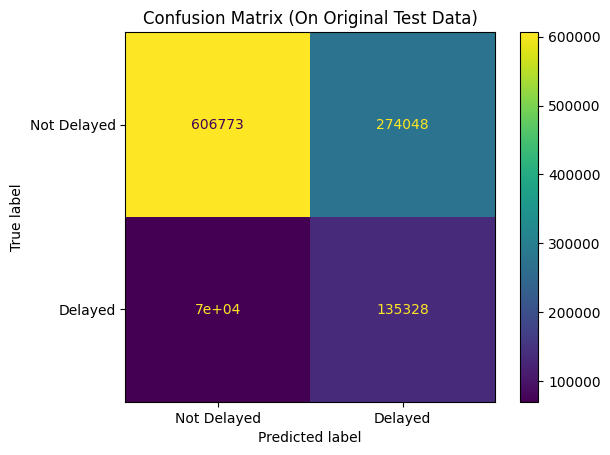

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

# Select all columns as features except the target column
features = df.columns.tolist()
features.remove('DEP_DEL15')

target = 'DEP_DEL15'  # You can choose another relevant column for binary classification
df = df.dropna(subset=[target])

# Split the dataset into training and testing sets
X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform RandomUnderSampler undersampling on the training data only
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Create and train an XGBoost classification model on the resampled training data
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test set
y_pred = model.predict(X_test)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the original test set
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

# Confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(model, X_test, y_test, display_labels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix (On Original Test Data)')
plt.show()


### Balancing with SMOTE and training with XGBoost

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_curve, auc
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

# Select all columns as features except the target column
features = df.columns.tolist()
features.remove('DEP_DEL15')

# features = [
#     'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
#     'CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME',
#     'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_NAME', 'NUMBER_OF_SEATS',
#     'PLANE_AGE', 'SEGMENT_NUMBER', 'AWND', 'PRCP',
#     'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT03', 'WT08',
#     'WT_FOG'
# ]

target = 'DEP_DEL15'  # You can choose another relevant column for binary classification
df = df.dropna(subset=[target])

# Split the dataset into training and testing sets
X = df[features]
y = df[target]

# Perform SMOTE undersampling on the target variable to balance it
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Create and train an XGBoost classification model
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)


# Confusion matrix
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(model, X_test, y_test, display_labels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix (After SMOTE)')
plt.show()



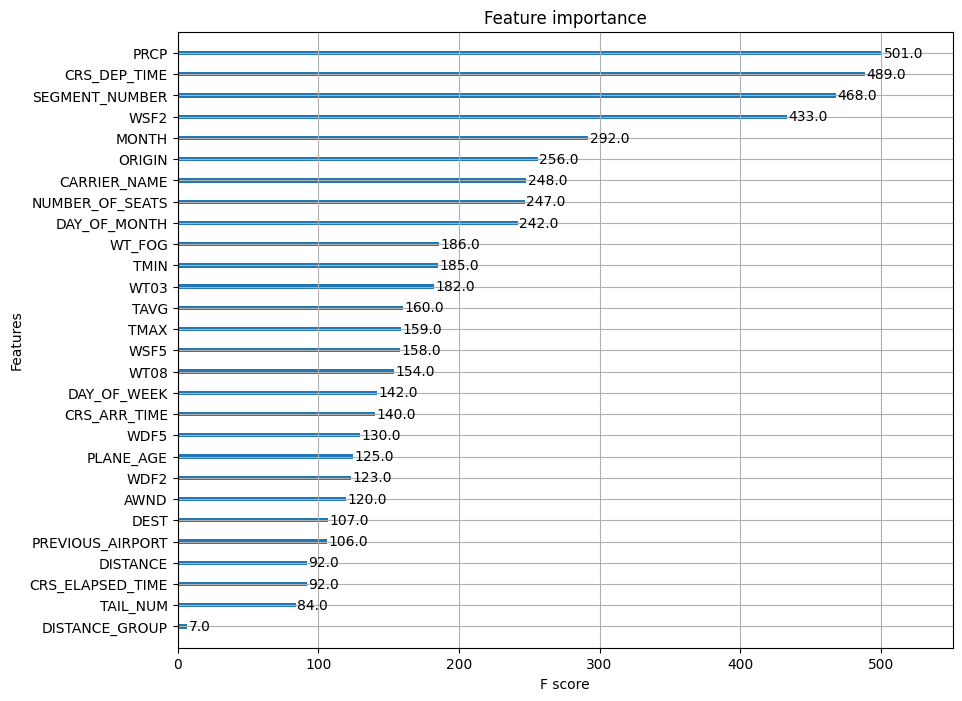

In [ ]:
# plot feature importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(model, ax=ax)
plt.show()

## Evaluation